## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA (Exploratory Data Analysis).


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import seaborn as sns
import json
from pandas.io.json import json_normalize

In [3]:
warnings.filterwarnings('ignore')

In [4]:
fname = '../data/january_flights.csv'
jan_flight_df = pd.read_csv(fname)
jan_flight_df['fl_date'] = pd.to_datetime(jan_flight_df['fl_date'])
jan = pd.to_datetime('2018-02-01')
jan_flight_df = jan_flight_df[jan_flight_df['fl_date'] < jan]

In [5]:
jan_flight_df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,row
0,2018-01-01,AA,AA,AA,1640,AA,N762US,1640,11298,DFW,...,15.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,6
1,2018-01-01,AA,AA,AA,1644,AA,N561UW,1644,13930,ORD,...,32.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12
2,2018-01-01,AA,AA,AA,1648,AA,N973UY,1648,11298,DFW,...,26.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,18
3,2018-01-01,AA,AA,AA,1651,AA,N534UW,1651,14100,PHL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
4,2018-01-01,AA,AA,AA,1104,AA,N998AN,1104,11298,DFW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30


In [6]:
fn_flight = '../data/flight_data.csv'
fn_passenger = '../data/passengers_sample.csv'
fn_fuel = '../data/fuel_consumption.csv'

In [7]:
flight_df = pd.read_csv(fn_flight)
passenger_df = pd.read_csv(fn_passenger)
fuel_df = pd.read_csv(fn_fuel)

In [368]:
flight_df[['wheels_off', 'taxi_out']]

,wheels_off,taxi_out
0,1823.0,11.0
1,1515.0,16.0
2,1339.0,12.0
3,2317.0,21.0
4,622.0,10.0
...,...,...
106178,1209.0,19.0
106179,1528.0,16.0
106180,1350.0,12.0
106181,621.0,16.0


In [6]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106183 entries, 0 to 106182
Data columns (total 43 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              106183 non-null  object 
 1   mkt_unique_carrier   106183 non-null  object 
 2   branded_code_share   106183 non-null  object 
 3   mkt_carrier          106183 non-null  object 
 4   mkt_carrier_fl_num   106183 non-null  int64  
 5   op_unique_carrier    106183 non-null  object 
 6   tail_num             105844 non-null  object 
 7   op_carrier_fl_num    106183 non-null  int64  
 8   origin_airport_id    106183 non-null  int64  
 9   origin               106183 non-null  object 
 10  origin_city_name     106183 non-null  object 
 11  dest_airport_id      106183 non-null  int64  
 12  dest                 106183 non-null  object 
 13  dest_city_name       106183 non-null  object 
 14  crs_dep_time         106183 non-null  int64  
 15  dep_time         

In [7]:
# flight_df[flight_df.columns[flight_df.columns != 'object']]
num = flight_df.columns[flight_df.dtypes != 'object'].tolist()
flight_df['dep_delay'].describe()

count    104488.000000
mean         10.839532
std          49.058229
min        -147.000000
25%          -6.000000
50%          -2.000000
75%           7.000000
max        1788.000000
Name: dep_delay, dtype: float64

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [8]:
stats.shapiro(flight_df['dep_delay'].dropna())

ShapiroResult(statistic=0.3714328408241272, pvalue=0.0)

In [9]:
delays = flight_df['dep_delay'][flight_df['dep_delay'] > 0]
stats.shapiro(delays)

ShapiroResult(statistic=0.4934779405593872, pvalue=0.0)

In [10]:
stats.shapiro(np.log(delays))

ShapiroResult(statistic=0.9852893352508545, pvalue=0.0)

<AxesSubplot:xlabel='dep_delay', ylabel='Density'>

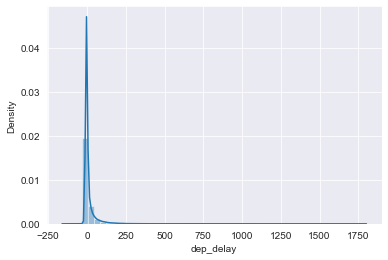

In [11]:
sns.distplot(flight_df['dep_delay'].dropna())

<AxesSubplot:xlabel='dep_delay', ylabel='Density'>

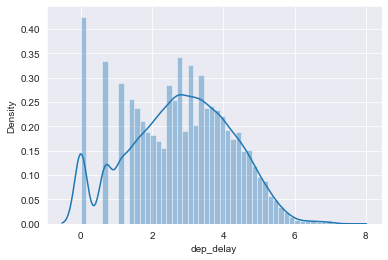

In [12]:
sns.distplot(np.log(delays))

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [13]:
flight_df['month'] = flight_df['fl_date'].str[5:-3]
flight_df[['month', 'dep_delay']].groupby(['month']).mean().sort_values('dep_delay')

,dep_delay
month,
10,6.859221
09,7.526791
03,8.714156
11,8.808516
04,8.903935
01,10.950055
12,11.634633
02,12.027834
05,12.089112


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [344]:
with open('january_weather.json') as f:
    file = json.load(f)

In [ ]:
json_normalize(file, record_path='2018', meta=['1'])

In [ ]:
''''fl_date: Flight Date (yyyy-mm-dd)
mkt_unique_carrier: Unique Marketing Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.
branded_code_share: Reporting Carrier Operated or Branded Code Share Partners
mkt_carrier: Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.
mkt_carrier_fl_num: Flight Number
op_unique_carrier: Unique Scheduled Operating Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users,for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.
op_carrier_fl_num: Flight Number
origin: Origin Airport
origin_city_name: Origin Airport, City Name
dest: Destination Airport
dest_city_name: Destination Airport, City Name
dep_time: Actual Departure Time (local time: hhmm)
dep_delay: Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.
taxi_out: Taxi Out Time, in Minutes
taxi_in: Taxi In Time, in Minutes
arr_delay: Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
cancelled: Cancelled Flight Indicator (1=Yes)
cancellation_code: Specifies The Reason For Cancellation
diverted: Diverted Flight Indicator (1=Yes)
dup: Duplicate flag marked Y if the flight is swapped based on Form-3A data
crs_elapsed_time: CRS Elapsed Time of Flight, in Minutes
actual_elapsed_time: Elapsed Time of Flight, in Minutes
air_time: Flight Time, in Minutes
distance: Distance between airports (miles)
carrier_delay: Carrier Delay, in Minutes
weather_delay: Weather Delay, in Minutes
nas_delay: National Air System Delay, in Minutes
security_delay: Security Delay, in Minutes
late_aircraft_delay: Late Aircraft Delay, in Minutes
first_dep_time: First Gate Departure Time at Origin Airport
total_add_gtime: Total Ground Time Away from Gate for Gate Return or Cancelled Flight
longest_add_gtime: Longest Time Away from Gate for Gate Return or Cancelled Flight'''

In [89]:
drop_list = ['crs_dep_time', 'origin_airport_id', 'dest_airport_id', 'tail_num', 'wheels_off', 'wheels_on',
             'crs_arr_time', 'flights']
drop_list_nas = ['no_name', 'longest_add_gtime', 'total_add_gtime', 'first_dep_time', 'security_delay',
                 'nas_delay', 'nas_delay', 'weather_delay', 'carrier_delay', 'cancellation_code', 'row']
drop_list.extend(drop_list_nas)
to_drop = list(set(drop_list))

In [90]:
jan_flight_cl = jan_flight_df.drop(to_drop, axis=1)

In [91]:
# cols to engineer
'''
delta_air_time: predicted minus actual airtime

'''

'\ndelta_air_time: predicted minus actual airtime\n\n'

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [92]:
jan_flight_cl.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'op_carrier_fl_num',
       'origin', 'origin_city_name', 'dest', 'dest_city_name', 'dep_time',
       'dep_delay', 'taxi_out', 'taxi_in', 'arr_time', 'arr_delay',
       'cancelled', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'distance', 'late_aircraft_delay'],
      dtype='object')

In [93]:
jan_flight_df[['taxi_in', 'dep_time']].sort_values('dep_time').corr()

,taxi_in,dep_time
taxi_in,1.000000,-0.049486
dep_time,-0.049486,1.000000


#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [94]:
print('On average the actual air time is smaller than predicted')
(jan_flight_cl['actual_elapsed_time'] - jan_flight_cl['crs_elapsed_time']).describe()

On average the actual air time is smaller than predicted


count    100019.000000
mean         -6.562603
std          18.341191
min       -1472.000000
25%         -14.000000
50%          -8.000000
75%           0.000000
max         153.000000
dtype: float64

In [95]:
print('therefore arrival delay is also reduces')
(jan_flight_cl['arr_delay'] - jan_flight_cl['dep_delay'] ).describe()

therefore arrival delay is also reduces


count    99908.000000
mean        -6.475748
std         13.847550
min       -139.000000
25%        -14.000000
50%         -8.000000
75%          0.000000
max        153.000000
dtype: float64

In [108]:
print(jan_flight_cl[jan_flight_cl['dep_delay'] > 0][['dep_delay','late_aircraft_delay']].dropna().corr())
double_delay = jan_flight_cl[jan_flight_cl['dep_delay'] > 0][['dep_delay','late_aircraft_delay']].dropna()
pct = double_delay[double_delay['late_aircraft_delay'] > 0]['dep_delay'].count() / double_delay['dep_delay'].count() * 100
print(f'{pct:.2f}% of delays had late aircraft delay')

                     dep_delay  late_aircraft_delay
dep_delay             1.000000             0.495896
late_aircraft_delay   0.495896             1.000000
57.96% of delays had late aircraft delay


In [74]:
jan_flight_df['late_aircraft_delay'].dropna().describe()

count    17976.000000
mean        27.169504
std         51.266552
min          0.000000
25%          0.000000
50%          2.000000
75%         33.000000
max        822.000000
Name: late_aircraft_delay, dtype: float64

#### **Task 6**: How many states cover 50% of US air traffic? 

In [141]:
cover_50pct = jan_flight_cl.shape[0] / 2
cover = 0
n = 0
for coverage in jan_flight_cl['origin_city_name'].value_counts():
    if cover <= cover_50pct:
        cover += coverage
        n += 1
    else:
        break
states = jan_flight_cl['origin_city_name'].value_counts()[:n].index.to_list()
{state[-2:] for state in states}
print(f'50% of the sample is {cover_50pct}')
print(f'These {len(states)} states cover {cover} flights: {states}')

50% of the sample is 50101.5
These 17 states cover 51813 flights: ['Chicago, IL', 'Atlanta, GA', 'New York, NY', 'Dallas/Fort Worth, TX', 'Denver, CO', 'Los Angeles, CA', 'Charlotte, NC', 'Houston, TX', 'Washington, DC', 'Phoenix, AZ', 'San Francisco, CA', 'Seattle, WA', 'Detroit, MI', 'Las Vegas, NV', 'Minneapolis, MN', 'Newark, NJ', 'Orlando, FL']


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay?

In [299]:
delays = jan_flight_cl[jan_flight_cl['dep_delay'] > 0]
not_delays = jan_flight_cl.drop(delays.index)
delays.dropna(inplace=True)
not_delays.dropna(inplace=True)

In [300]:
delays_speed = delays['distance'] / (delays['actual_elapsed_time'] / 60)
not_delays_speed = not_delays['distance'] / (not_delays['actual_elapsed_time'] / 60)

In [301]:
shapiro = stats.shapiro(delays_speed.dropna())
shapiro

ShapiroResult(statistic=0.9912033677101135, pvalue=6.360015006310429e-30)

<AxesSubplot:ylabel='Density'>

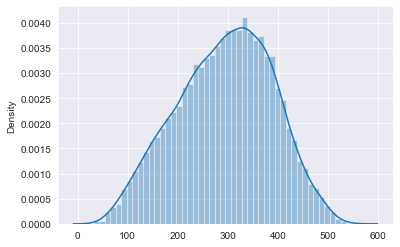

In [305]:
sns.distplot(delays_speed.dropna())

In [303]:
shapiro = stats.shapiro(not_delays_speed.dropna())
shapiro

ShapiroResult(statistic=0.9881905317306519, pvalue=3.847676951357348e-12)

<AxesSubplot:ylabel='Density'>

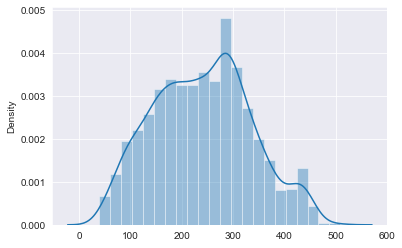

In [306]:
sns.distplot(not_delays_speed.dropna())

In [307]:
stat, p = stats.ttest_ind(delays_speed, not_delays_speed)
print(f'stat={stat:.3f}, p={p:.12f}')
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=24.116, p=0.000000000000
Probably different distributions


In [311]:
print(f'delay_air_time_delta: \nMean: {delays_speed.mean()}, Median: {delays_speed.median()}, Mode: {delays_speed.mode()[0]}')
print(f'reg_air_time_delta: \nMean: {not_delays_speed.mean()}, Median: {not_delays_speed.median()}, Mode: {not_delays_speed.mode()[0]}')

delay_air_time_delta: 
Mean: 293.72020591707155, Median: 300.0, Mode: 240.0
reg_air_time_delta: 
Mean: 240.5105194409304, Median: 241.5608108108108, Mode: 120.0


In [312]:
print('Clearly flights that are delayed fly at higher speed')

Clearly flights that are delayed fly at higher speed


 ##### Checking distributions based on Delta Flying Time for Delayed VS Delta Flying Time for Not Delayed flights

In [292]:
delays = jan_flight_cl['dep_delay'][jan_flight_cl['dep_delay'] > 0]
air_time_delta = (jan_flight_cl['actual_elapsed_time'] - jan_flight_cl['crs_elapsed_time'])
delay_air_time_delta = (jan_flight_cl['actual_elapsed_time'].iloc[delays.index] -
                        jan_flight_cl['crs_elapsed_time'].iloc[delays.index])
reg_air_time_delta = (jan_flight_cl['actual_elapsed_time'].drop(delays.index) -
                      jan_flight_cl['crs_elapsed_time'].drop(delays.index))

In [274]:
delay_air_time_delta = delay_air_time_delta[delay_air_time_delta > -30]  # if switch to 60 => results in different distributions
delay_air_time_delta = delay_air_time_delta[delay_air_time_delta < 30]
reg_air_time_delta = reg_air_time_delta[reg_air_time_delta > -30]
reg_air_time_delta = reg_air_time_delta[reg_air_time_delta < 30]

In [275]:
shapiro = stats.shapiro(delay_air_time_delta.dropna())
shapiro

ShapiroResult(statistic=0.9793580770492554, pvalue=0.0)

<AxesSubplot:ylabel='Density'>

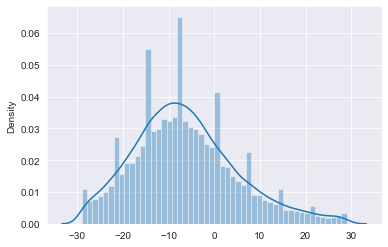

In [276]:
sns.distplot(delay_air_time_delta)

In [277]:
shapiro = stats.shapiro(reg_air_time_delta.dropna())
shapiro

ShapiroResult(statistic=0.9841415286064148, pvalue=0.0)

<AxesSubplot:ylabel='Density'>

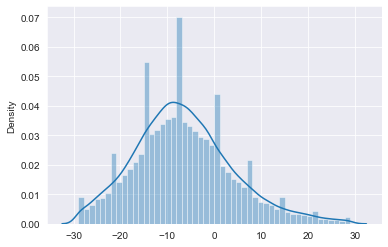

In [278]:
sns.distplot(reg_air_time_delta)

In [279]:
stat, p = stats.ttest_ind(reg_air_time_delta, delay_air_time_delta)
print(f'stat={stat:.3f}, p={p:.12f}')
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-1.410, p=0.158419221596
Probably the same distribution


In [281]:
print(f'delay_air_time_delta: \nMean: {delay_air_time_delta.mean()}, Median: {delay_air_time_delta.median()}, Mode: {delay_air_time_delta.mode()}')
print(f'reg_air_time_delta: \nMean: {reg_air_time_delta.mean()}, Median: {reg_air_time_delta.median()}, Mode: {reg_air_time_delta.mode()}')

delay_air_time_delta: 
Mean: -6.413436607699629, Median: -7.0, Mode: 0   -9.0
dtype: float64
reg_air_time_delta: 
Mean: -6.519470693595207, Median: -7.0, Mode: 0   -9.0
dtype: float64


In [262]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [314]:
passenger_df.drop('row', axis=1)

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,80.0,80.0,800000.0,4000.0,2883.0,0.0,0.0,166.0,4927.0,2786.0,...,US,United States,6,675,1,2019,1,1,F,DU
1,78.0,61.0,2239600.0,9089.0,6440.0,664.0,0.0,978.0,9974.0,8217.0,...,US,United States,6,694,1,2019,1,2,F,DU
2,82.0,82.0,1630652.0,6232.0,4202.0,0.0,0.0,1211.0,16554.0,14456.0,...,US,United States,6,673,1,2019,1,3,F,DU
3,77.0,87.0,3114600.0,11919.0,10010.0,61215.0,78300.0,954.0,15241.0,12025.0,...,US,United States,6,698,1,2019,1,2,F,DU
4,86.0,86.0,3791516.0,15394.0,12586.0,1399.0,2856.0,602.0,8904.0,7000.0,...,US,United States,6,888,1,2019,1,2,F,DU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117519,89.0,87.0,3010200.0,12441.0,10742.0,22079.0,0.0,680.0,10894.0,8732.0,...,US,United States,6,612,1,2019,12,2,F,DU
117520,91.0,91.0,3643410.0,14704.0,13837.0,2488.0,0.0,1005.0,14559.0,12055.0,...,US,United States,6,614,1,2019,12,3,F,DU
117521,89.0,86.0,1852560.0,6536.0,5755.0,2.0,0.0,573.0,11395.0,8266.0,...,US,United States,6,638,1,2019,12,2,F,DU
117522,90.0,90.0,3644500.0,14400.0,13299.0,1073.0,29167.0,1217.0,19278.0,16611.0,...,US,United States,6,614,1,2019,12,3,F,DU


In [315]:
fuel_df

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5100.0,0.0,5100.0,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405.0,0.0,0.0,0.0,0.0,522405.0,569497.0,0.0,569497.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,12,20377.0,X9,X9,Omni Air International LLC,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1584314.0,4588387.0,6172701.0,2018
3031,12,20207.0,XP,XP,XTRA Airways,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
3032,12,20378.0,YV,YV,Mesa Airlines Inc.,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
3033,12,20452.0,YX,YX,Republic Airline,2,21048.0,0.0,0.0,0.0,...,50043.0,0.0,0.0,0.0,0.0,50043.0,50043.0,0.0,50043.0,2018


#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [316]:
cover_50pct = jan_flight_cl.shape[0] / 2
cover = 0
n = 0
for coverage in jan_flight_cl['origin_city_name'].value_counts():
    if cover <= cover_50pct:
        cover += coverage
        n += 1
    else:
        break
states = jan_flight_cl['origin_city_name'].value_counts()[:n].index.to_list()

In [317]:
print(f'50% of the sample is {cover_50pct}')
print(f'These {len(states)} states cover {cover} flights: {states}')

50% of the sample is 50101.5
These 17 states cover 51813 flights: ['Chicago, IL', 'Atlanta, GA', 'New York, NY', 'Dallas/Fort Worth, TX', 'Denver, CO', 'Los Angeles, CA', 'Charlotte, NC', 'Houston, TX', 'Washington, DC', 'Phoenix, AZ', 'San Francisco, CA', 'Seattle, WA', 'Detroit, MI', 'Las Vegas, NV', 'Minneapolis, MN', 'Newark, NJ', 'Orlando, FL']


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [349]:
flight_df['month'] = pd.to_numeric(flight_df['fl_date'].str[5:7])

In [364]:
delays_per_month = flight_df.groupby(['op_unique_carrier', 'month'])[['dep_delay']].sum()

In [367]:
distance_per_month = flight_df.groupby(['op_unique_carrier', 'month'])[['distance']].sum()

In [379]:
passengers_per_month = passenger_df.groupby(['carrier'])[['passengers']].sum()

In [382]:
fuel_consumption = fuel_df.groupby(['unique_carrier'])[['total_gallons']].sum()

In [390]:
fuel_consumption.merge(passengers_per_month, left_index='unique_carrier', how='left')

ValueError: left_index parameter must be of type bool, not <class 'str'>

In [ ]:
pas

### Extras

In [ ]:
(jan_flight_cl['actual_elapsed_time'] - jan_flight_cl['crs_elapsed_time'])